# Модуль 4

Основна задача цього модулю - знайомство з основним іструментарієм аналізу в Python.

![](https://consequenceofsound.net/wp-content/uploads/2020/02/Corona-Beer-Coronavirus-survey-poll-americans-drinking.jpg)


**Зміст**

1. Знайомство з numpy - бібліотекою, що містить функціонал лінійної алгебри.
2. Знайомство з pandas - бібліотекою з іструментами роботи із таблицями даних.
3. Знайомство з scipy - бібліотекою, що містить набори статистичних тестів.
4. Знайомство з matplotlib - бібліотекою, що містить функції для візуалізацій статистик.

Код можна супроводжувати вставками тексту. Можна додавати картинки, як вище. 

Можна додавати формули, такі як формула стандартного відхилення для невеликої вибірки:

$$
s=\sqrt{\frac{1}{n-1}\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}
$$

Ще нижче побачимо, як можна робити візуалізації.

Це все нам знадобиться для курсового проекту.

Класичний початок роботи data scientist над проектом:

In [ ]:
import numpy as np
import pandas as pd

Саме цими двома бібліотеками можна зробити 99% роботи з даними в Python.

Про них і піде мова сьогодні.

# Знайомство з numpy

**Задача 1**

Піднесіть в квадрат наступні числа і порахуйте медіану цього числового ряду:

In [ ]:
[1,2,3,4,5,6]*2

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

In [ ]:
%%time

x = [i**2 for i in [1,2,3,4,5,6]*20000]

CPU times: user 34.6 ms, sys: 1.02 ms, total: 35.6 ms
Wall time: 35.9 ms


In [ ]:
%%time

np.array([1,2,3,4,5,6]*20000)**2

CPU times: user 10.1 ms, sys: 11 µs, total: 10.1 ms
Wall time: 16.1 ms


array([ 1,  4,  9, ..., 16, 25, 36])

А тепер зробимо це саме тільки простіше.

In [ ]:
g = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])**2

g.shape

(20,)

In [ ]:
g

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256, 289, 324, 361])

In [ ]:
g.reshape((5, -1, 2))#.shape

array([[[  0,   1],
        [  4,   9]],

       [[ 16,  25],
        [ 36,  49]],

       [[ 64,  81],
        [100, 121]],

       [[144, 169],
        [196, 225]],

       [[256, 289],
        [324, 361]]])

In [ ]:
g

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256, 289, 324, 361, 400])

Перевага numpy не тільки в простоті, але і у швидкості. Заодно випробуємо можливості Юпітера у плані вимірювання швидкості.

In [ ]:
%%time

from statistics import median

print(median([x**2 for x in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]*1000000]))

110.5
CPU times: user 8.12 s, sys: 62.1 ms, total: 8.19 s
Wall time: 8.19 s


In [ ]:
%%time

np.median(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]*1000000)**2)

CPU times: user 1.72 s, sys: 5.85 ms, total: 1.73 s
Wall time: 1.73 s


110.5

In [ ]:
8.12/1.72

4.720930232558139

In [ ]:
np.all(np.array(list(map(lambda x: x**2, 
                         [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]*100000))) == np.array([x**2 for x in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]*100000]))

True

In [ ]:
%%time

g.reshape(-1, 4).mean(axis=0)

CPU times: user 0 ns, sys: 81 µs, total: 81 µs
Wall time: 83.4 µs


array([ 96., 113., 132., 153.])

In [ ]:
g.reshape(-1, 4)

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225],
       [256, 289, 324, 361]])

In [ ]:
%%time

np.sum(g.reshape(-1, 4), axis = 1)

CPU times: user 70 µs, sys: 2 µs, total: 72 µs
Wall time: 75.6 µs


array([  14,  126,  366,  734, 1230])

In [ ]:
np.mean(g.reshape(-1, 4), axis = 1)

np.median(g.reshape(-1, 4), axis = 1)

np.sum(g.reshape(-1, 4), axis = 1)

np.min(g.reshape(-1, 4), axis = 1)

print(np.max(g.reshape(-1, 4), axis = 1))

print(np.argmax(g.reshape(-1, 4), axis = 1))

np.amin(g.reshape(-1, 4), axis = 1)

np.std(g.reshape(-1, 4), axis = 1)

np.argsort(g)

[  9  49 121 225 361]
[3 3 3 3 3]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Доступні типи даних в numpy:

In [ ]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [ ]:
np.array(g, dtype = np.uint)*1.0

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.,
       121., 144., 169., 196., 225., 256., 289., 324., 361.])

In [ ]:
a = np.array([1.0, False, 3], dtype=np.float16) 
print("Тип масиву:",type(a))
print("Тип масиву:", a.dtype)          
print("Розмір масиву:",a.shape)           
print("Елементи масиву:",a[0], a[1], a[2])  
a[0:2] = 5, 7             
print("Масив:",a)                 

Тип масиву: <class 'numpy.ndarray'>
Тип масиву: float16
Розмір масиву: (3,)
Елементи масиву: 1.0 0.0 3.0
Масив: [5. 7. 3.]


In [ ]:
[[1,2,3],[4,5,6],[9,8]]

[[1, 2, 3], [4, 5, 6], [9, 8]]

In [ ]:
b = np.array([[1,2,3],[4,5,6],[9,8,0]])
print(b)
print("Розмір двовимірного масиву:",b.shape)                 
print("Елементи двовимірного масиву:", b[:,1], b[0, 1], b[1, 0])

[[1 2 3]
 [4 5 6]
 [9 8 0]]
Розмір двовимірного масиву: (3, 3)
Елементи двовимірного масиву: [2 5 8] 2 4


In [ ]:
b[b.sum(axis=1) < 15,:]

array([[1, 2, 3]])

In [ ]:
b[np.sum(b, axis=1) < 15,:]

array([[1, 2, 3]])

In [ ]:
stage_1 = np.sum(b, axis=1)

print(stage_1)

stage_2 = stage_1 < 15

print(stage_2)

stage_3 = b[stage_2, :]

print(stage_3)


[ 6 15 17]
[ True False False]
[[1 2 3]]


In [ ]:
b[np.sum(b, axis=1) < 15,:].shape

(1, 3)

In [ ]:
b[np.sum(b, axis=1) < 15,:].squeeze().shape

(3,)

In [ ]:
b[np.sum(b, axis=1) < 15,:], b[np.sum(b, axis=1) < 15,:].squeeze()

(array([[1, 2, 3]]), array([1, 2, 3]))

In [ ]:
b[np.sum(b, axis=1) < 15,:].sum(axis=0), b[np.sum(b, axis=1) < 15,:].squeeze().sum(axis=0)

(array([1, 2, 3]), 6)

In [ ]:
np.squeeze(b[np.sum(b, axis=1) < 15,:])

array([1, 2, 3])

In [ ]:
a = np.zeros((2,3))   
print("Масив 0-в: \n",a)              

b = np.ones((10,2))    
print("Масив 1-ць: \n",b)              

c = np.full((2,2), 7) 
print("Масив 7-к: \n",c)              

d = np.eye(2)         
print("Масив identity: \n",d)              

e = np.random.random((20,20))
print("Масив рандомних чисел: \n", e)  

f = np.array(np.round(np.random.random((20,20))*100),dtype=np.int)
print("Масив рандомних чисел: \n", f) 

Масив 0-в: 
 [[0. 0. 0.]
 [0. 0. 0.]]
Масив 1-ць: 
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Масив 7-к: 
 [[7 7]
 [7 7]]
Масив identity: 
 [[1. 0.]
 [0. 1.]]
Масив рандомних чисел: 
 [[0.72877888 0.4364611  0.24270245 0.72035276 0.25637919 0.46593912
  0.76996604 0.94179468 0.51222166 0.72537349 0.04012342 0.59832136
  0.54287689 0.96994924 0.55099136 0.11220329 0.72341258 0.5322349
  0.18760954 0.17021668]
 [0.81031872 0.47364986 0.3182464  0.56139818 0.37497994 0.80745047
  0.42630696 0.9535729  0.91578376 0.11326275 0.64330445 0.87286648
  0.68046411 0.29879974 0.06029542 0.9193236  0.4783311  0.06773615
  0.39015905 0.88349943]
 [0.47270315 0.55780433 0.85579523 0.19342935 0.9560011  0.01106824
  0.26164414 0.07560279 0.56653972 0.73850827 0.78118479 0.8392919
  0.49747337 0.5946868  0.61562493 0.90449507 0.73396809 0.46305842
  0.18095131 0.52667043]
 [0.38542557 0.91660442 0.50728162 0.70655477 0.82987323 0.40977855
  0.40849993 0

In [ ]:
np.array(range(7,10, 2))

array([7, 9])

In [ ]:
np.arange(1, 77, 0.4234).reshape((-1,5,12))

array([[[ 1.    ,  1.4234,  1.8468,  2.2702,  2.6936,  3.117 ,  3.5404,
          3.9638,  4.3872,  4.8106,  5.234 ,  5.6574],
        [ 6.0808,  6.5042,  6.9276,  7.351 ,  7.7744,  8.1978,  8.6212,
          9.0446,  9.468 ,  9.8914, 10.3148, 10.7382],
        [11.1616, 11.585 , 12.0084, 12.4318, 12.8552, 13.2786, 13.702 ,
         14.1254, 14.5488, 14.9722, 15.3956, 15.819 ],
        [16.2424, 16.6658, 17.0892, 17.5126, 17.936 , 18.3594, 18.7828,
         19.2062, 19.6296, 20.053 , 20.4764, 20.8998],
        [21.3232, 21.7466, 22.17  , 22.5934, 23.0168, 23.4402, 23.8636,
         24.287 , 24.7104, 25.1338, 25.5572, 25.9806]],

       [[26.404 , 26.8274, 27.2508, 27.6742, 28.0976, 28.521 , 28.9444,
         29.3678, 29.7912, 30.2146, 30.638 , 31.0614],
        [31.4848, 31.9082, 32.3316, 32.755 , 33.1784, 33.6018, 34.0252,
         34.4486, 34.872 , 35.2954, 35.7188, 36.1422],
        [36.5656, 36.989 , 37.4124, 37.8358, 38.2592, 38.6826, 39.106 ,
         39.5294, 39.9528, 40.3762, 4

In [ ]:
import random

random.seed(1)

random.randint(1, 10)
#np.random.random((2,2))*100

3

In [ ]:
np.mean(e, 0), np.mean(e, 1), np.mean(e)

(array([0.47272197, 0.62225357, 0.53485514, 0.50269833, 0.43796119,
        0.47725012, 0.43362749, 0.59752302, 0.6641064 , 0.52154433,
        0.45172539, 0.55312987, 0.61710358, 0.5122263 , 0.59390925,
        0.53114039, 0.53611871, 0.57527555, 0.53187819, 0.49047779]),
 array([0.51139543, 0.55248747, 0.54132507, 0.55233622, 0.47699166,
        0.45383374, 0.48507058, 0.55263235, 0.40037847, 0.53494597,
        0.58027622, 0.55886475, 0.47759656, 0.64684425, 0.58916341,
        0.55309195, 0.5941469 , 0.49064701, 0.52762101, 0.57787757]),
 0.5328763299560151)

In [ ]:
g

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256, 289, 324, 361])

In [ ]:
np.abs(np.sort(g.reshape(2,-1)*-1, axis = 1))

array([[ 81,  64,  49,  36,  25,  16,   9,   4,   1,   0],
       [361, 324, 289, 256, 225, 196, 169, 144, 121, 100]])

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = a[1:, 1:3]

print(b)

print("Елемент до:", a[0, 1]) 
b[b[:, 1] < 10, 0] = 77    

print(b)

print("Елемент після:",a[0, 1])

[[ 6  7]
 [10 11]]
Елемент до: 2
[[77  7]
 [10 11]]
Елемент після: 2


In [ ]:
b[:,1:]

array([[11]])

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

row_r1 = a[1, :]   
row_r2 = a[1:2, :] 
print("Всі елементи другого ряду:",row_r1, row_r1.shape) 
print("2-3 елементи другого ряду:",row_r2, row_r2.shape) 

col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print("Всі елементи другої колонки:",col_r1, col_r1.shape) 
print("2-3 елементи другої колонки:",col_r2, col_r2.shape) 

Всі елементи другого ряду: [5 6 7 8] (4,)
2-3 елементи другого ряду: [[5 6 7 8]] (1, 4)
Всі елементи другої колонки: [ 2  6 10] (3,)
2-3 елементи другої колонки: [[ 2]
 [ 6]
 [10]] (3, 1)


In [ ]:
#Інші перетворення з масивами

a = np.array([[1,2], [3, 4], [5, 6]])

print(a)

print(a[[0, 1, 2], [0, 1, 0]]) 

print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  

#print(a[[0, 0], [1, 1]])  

#print(np.array([a[0, 1], a[0, 1]])) 

[[1 2]
 [3 4]
 [5 6]]
[1 4 5]
[1 4 5]


In [ ]:
np.arange(1,100, 20) #Масив від 0 до 9

array([ 1, 21, 41, 61, 81])

In [ ]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print("Вивід усіх елементів: \n",a) 

b = np.array([0, 2, 0, 1])

print("Вивід елементів 0, 2, 0, 1: \n",a[np.arange(4), b]) 

a[np.arange(4), b] += 10 # a[np.arange(4), b] = a[np.arange(4), b] + 10

print("Перезапис елементів 0, 2, 0, 1: \n",a)

Вивід усіх елементів: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Вивід елементів 0, 2, 0, 1: 
 [ 1  6  7 11]
Перезапис елементів 0, 2, 0, 1: 
 [[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


In [ ]:
a[:, [2, 0, 2, 2, 1]]

array([[ 3, 11,  3,  3,  2],
       [16,  4, 16, 16,  5],
       [ 9, 17,  9,  9,  8],
       [12, 10, 12, 12, 21]])

In [ ]:
a = np.array([[1,1], [3, 4], [5, 6]])

bool_idx = (a >= 2) 

print("Булевий масив: \n",bool_idx) 

print("Сабсет: \n",a[bool_idx])  

print("Сабсет: \n",a[a > 2])

a[a >= 2] = 0
a

Булевий масив: 
 [[False False]
 [ True  True]
 [ True  True]]
Сабсет: 
 [3 4 5 6]
Сабсет: 
 [3 4 5 6]


array([[1, 1],
       [0, 0],
       [0, 0]])

In [ ]:
#Типи елементів

x = np.array([1.6, 2.001, 1.999], dtype=np.float16)
print(np.trunc(x))
print(np.floor(x))
print(np.array(x, dtype=np.int8))
print(np.round(x, 1))
print(np.ceil(x))
print(x.dtype)       

x = np.array([1.0, 2.0], dtype=np.bool)
print(x)
print(x.dtype)          

x = np.array([1, 2.0, True], dtype=np.int8)
print(x)
print(x.dtype)  

[1. 2. 1.]
[1. 2. 1.]
[1 2 1]
[1.6 2.  2. ]
[2. 3. 2.]
float16
[ True  True]
bool
[1 2 1]
int8


In [ ]:
#Математичні операції з масивами

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[True,False],[False,True]], dtype=np.bool)

print(x + y)
print(np.add(x, y))

print(x - y)
print(np.subtract(x, y))

print(x * y)
print(np.multiply(x, y))

print(x / y)
print(np.divide(x, y))

print(x**(0.1))
print(np.sqrt(x))

[[2. 2.]
 [3. 5.]]
[[2. 2.]
 [3. 5.]]
[[0. 2.]
 [3. 3.]]
[[0. 2.]
 [3. 3.]]
[[1. 0.]
 [0. 4.]]
[[1. 0.]
 [0. 4.]]
[[ 1. inf]
 [inf  4.]]
[[ 1. inf]
 [inf  4.]]
[[1.         1.07177346]
 [1.11612317 1.14869835]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [ ]:
#Множення матриць

x = np.array([[1,2],[3,4],[3,4], [5,6]])
y = np.array([[5,6, 7, 10, 14],[7,8, 9, 11, 12]])

print(x)
print(y)

#print(x.dot(y))
print(np.dot(x, y))

[[1 2]
 [3 4]
 [3 4]
 [5 6]]
[[ 5  6  7 10 14]
 [ 7  8  9 11 12]]
[[ 19  22  25  32  38]
 [ 43  50  57  74  90]
 [ 43  50  57  74  90]
 [ 67  78  89 116 142]]


In [ ]:
x = np.array([[1,2],[3,4]])

print("Сума елементів масиву: \n",np.sum(x)) 
print("Сума елементів масиву по колонках: \n",np.sum(x, axis=0))  
print("Сума елементів масиву по рядах: \n",np.sum(x, axis=1))

Сума елементів масиву: 
 10
Сума елементів масиву по колонках: 
 [4 6]
Сума елементів масиву по рядах: 
 [3 7]


In [ ]:
np.sqrt(np.var([100,1010,1000]))

426.64062420522293

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, -1, 1])
print(v)
vv = np.tile(v, (5, 5))  
print(vv)                 
#y = x + vv  
#print(y)

[ 1 -1  1]
[[ 1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1]
 [ 1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1]
 [ 1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1]
 [ 1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1]
 [ 1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1]]


In [ ]:
vv.shape

(5, 15)

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1,2])

print(x)

print(v)
print(v.reshape((2,2)))
#y = x + v.reshape((2,2))
print(y)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 0 1 2]
[[1 0]
 [1 2]]
[[ 5  6  7 10 14]
 [ 7  8  9 11 12]]


In [ ]:
v.reshape((4,1)), v

(array([[1],
        [0],
        [1],
        [2]]), array([1, 0, 1, 2]))

In [ ]:
gr = g.reshape((4, 5)).T
print(gr)
gr[(gr.sum(1)>100) & (gr.sum(1)<500), :][:, gr.sum(0)<500]

[[  0  25 100 225]
 [  1  36 121 256]
 [  4  49 144 289]
 [  9  64 169 324]
 [ 16  81 196 361]]


array([[ 0, 25],
       [ 1, 36],
       [ 4, 49]])

In [ ]:
np.reshape(np.array([[1,2,3],[4,5,6]]), (2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.array([[1,2,3],[4,5,6]]).T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
v = np.array([1,2,3])  
w = np.array([4,5])    

print(np.reshape(v, (3, 1)) * w)

x = np.array([[1,2,3], [4,5,6]])

print(x + v)

print((x.T + w).T)

print(x + np.reshape(w, (2, 1)))

print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


In [ ]:
a = np.array([1,2,3,4]).reshape(-1,2)
b = np.array([3,4,5,4]).reshape(-1,2)
print(a, b)
np.concatenate([a, b], axis = 0), np.concatenate([a, b], axis = 1)

[[1 2]
 [3 4]] [[3 4]
 [5 4]]


(array([[1, 2],
        [3, 4],
        [3, 4],
        [5, 4]]), array([[1, 2, 3, 4],
        [3, 4, 5, 4]]))

In [ ]:
np.log1p((((np.array([1,2.8,3,4])==2)/2)+True)*
         np.array([False-2,True,10,-7])**(2))

array([1.60943791, 0.69314718, 4.61512052, 3.91202301])

In [ ]:
np.log1p(0) == np.log(0+1)

True

In [ ]:
np.log((((np.array([1,2,3,4])==2)/2)+True+1)) == np.log1p((((np.array([1,2,3,4])==2)/2)+True))

array([ True,  True,  True,  True])

In [ ]:
np.exp(np.log1p((((np.array([1,2,3,4])==2)/2)+True)))-1

array([1. , 1.5, 1. , 1. ])

In [ ]:
a = np.array([1,2,4,5]).reshape((2, 2))
b = np.array([5, 7]).reshape((2, 1))

print(a, b)

np.linalg.solve(a, b)

[[1 2]
 [4 5]] [[5]
 [7]]


array([[-3.66666667],
       [ 4.33333333]])

In [ ]:
a.dot(np.linalg.solve(a, b))

array([[5.],
       [7.]])

# Pandas

бібліотека для роботи з таблицями даних в Python

## 1. Створення дата фрейму

In [14]:
d = {
    'x': [1,2,3,4],
    'y': [True],
    'y': [True, False, False]
}

d

{'x': [1, 2, 3, 4], 'y': [True, False, False]}

In [15]:
import pandas as pd

pd.DataFrame({
    'x': [1,2,3,4],
    'y': [True,False,False,True],
    'z': 1
})

,x,y,z
0,1,True,1
1,2,False,1
2,3,False,1
3,4,True,1


## 2. Зчитування дата фрейму

Зчитати файл у падас просто, за це відповідають функції типу ```pd.read_{format_name}```

Давайте прочитаємо наш датасет про коронавірус з формату csv:

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/ncov_outside_hubei.csv",
                 sep = ",",  #header = None,   
                 index_col=0, encoding = "ISO-8859-1")

In [17]:
df

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
5,50,female,"Feidong County, Hefei City",Anhui,China,1,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,"Family cluster in Agra, linked to Delhi case",NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,"Family cluster in Agra, linked to Delhi case",NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14935,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,"Family cluster in Agra, linked to Delhi case",NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Описові функції

In [19]:
df.head(20)

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
5,50,female,"Feidong County, Hefei City",Anhui,China,1,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN
6,NaN,NaN,Lu'an City,Anhui,China,1,31.759410,116.315100,admin2,NaN,NaN,24.01.2020,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.bjnews.com.cn/news/2020/01/24/67877...,NaN,NaN,NaN,NaN,NaN,NaN,Lu'an City,Anhui,China,341500,NaN
7,42,female,Fuyang City,Anhui,China,1,32.918800,115.703600,admin2,21.01.2020,21.01.2020,22.01.2020,fever,no,19.01.2020,Wuhan,NaN,transportation drivers often travel between Wu...,NaN,NaN,https://baijiahao.baidu.com/s?id=1656791146764...,NaN,NaN,NaN,NaN,NaN,NaN,Fuyang City,Anhui,China,341200,NaN
8,NaN,female,Huaibei City,Anhui,China,1,33.727220,116.742400,admin2,NaN,NaN,25.01.2020,NaN,no,13.01.2020,Wuhan,NaN,left Wuhan,NaN,NaN,http://wjw.huaibei.gov.cn/xxfb/tzgg/55968731.html,NaN,NaN,NaN,NaN,NaN,NaN,Huaibei City,Anhui,China,340600,NaN
9,59,female,Huainan City,Anhui,China,1,32.757380,116.734000,admin2,19.01.2020,24.01.2020,26.01.2020,fever,yes,22.01.2020,Wuhan,NaN,arrived in Huainan from Wuhan,NaN,NaN,https://baijiahao.baidu.com/s?id=1656845876146...,NaN,NaN,NaN,NaN,NaN,NaN,Huainan City,Anhui,China,340400,NaN


In [22]:
pd.concat([df.tail(5), df.head(5)], axis = 0)

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14933,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,"Family cluster in Agra, linked to Delhi case",NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14934,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,"Family cluster in Agra, linked to Delhi case",NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14935,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,"Family cluster in Agra, linked to Delhi case",NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14936,NaN,NaN,NaN,Telangana,India,1,17.366000,78.475000,admin,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14937,NaN,NaN,NaN,Telangana,India,1,17.366000,78.475000,admin,NaN,NaN,04.03.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pib.gov.in/PressReleaseIframePage.aspx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN


In [23]:
print(f'У цій таблиці є {df.shape[1]} колонки та {df.shape[0]} рядки')

У цій таблиці є 32 колонки та 14602 рядки


In [24]:
df.describe()

,wuhan(0)_not_wuhan(1),latitude,longitude,chronic_disease_binary
count,14602.0,14599.000000,14599.000000,28.000000
mean,1.0,32.401920,104.570152,0.821429
std,0.0,7.705318,34.587901,0.390021
min,1.0,-42.000000,-124.953070,0.000000
25%,1.0,27.905380,108.787200,1.000000
50%,1.0,32.572480,114.851500,1.000000
75%,1.0,35.781340,120.173600,1.000000
max,1.0,69.817800,174.740000,1.000000


In [26]:
hubei = pd.read_csv("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/hubei_20200301.csv",
                    index_col=0, encoding = "ISO-8859-1")
hubei.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,10,11,13,14,17,18,20,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,sex,city,province,country,not_wuhan,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
2,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
3,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
4,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
5,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
6,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
7,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
8,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0
9,15-88,male,Wuhan City,Hubei,China,0,30.596415,114.27978,point,pre 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100.0


In [27]:
hubei.shape

(21241, 31)

In [30]:
#df = df.drop(columns=['data_moderator_initials'])
df.drop(columns=['data_moderator_initials'], inplace=True)
df.head(10)

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181
2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111
3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104
4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104
5,50,female,"Feidong County, Hefei City",Anhui,China,1,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122
6,NaN,NaN,Lu'an City,Anhui,China,1,31.759410,116.315100,admin2,NaN,NaN,24.01.2020,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.bjnews.com.cn/news/2020/01/24/67877...,NaN,NaN,NaN,NaN,NaN,NaN,Lu'an City,Anhui,China,341500
7,42,female,Fuyang City,Anhui,China,1,32.918800,115.703600,admin2,21.01.2020,21.01.2020,22.01.2020,fever,no,19.01.2020,Wuhan,NaN,transportation drivers often travel between Wu...,NaN,NaN,https://baijiahao.baidu.com/s?id=1656791146764...,NaN,NaN,NaN,NaN,NaN,NaN,Fuyang City,Anhui,China,341200
8,NaN,female,Huaibei City,Anhui,China,1,33.727220,116.742400,admin2,NaN,NaN,25.01.2020,NaN,no,13.01.2020,Wuhan,NaN,left Wuhan,NaN,NaN,http://wjw.huaibei.gov.cn/xxfb/tzgg/55968731.html,NaN,NaN,NaN,NaN,NaN,NaN,Huaibei City,Anhui,China,340600
9,59,female,Huainan City,Anhui,China,1,32.757380,116.734000,admin2,19.01.2020,24.01.2020,26.01.2020,fever,yes,22.01.2020,Wuhan,NaN,arrived in Huainan from Wuhan,NaN,NaN,https://baijiahao.baidu.com/s?id=1656845876146...,NaN,NaN,NaN,NaN,NaN,NaN,Huainan City,Anhui,China,340400


In [32]:
df = pd.concat([df, hubei]).reset_index()
df

,index,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,not_wuhan,lives_in_wuhan
0,1,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN
1,2,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN
2,3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN
3,4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN
4,5,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35838,21237,NaN,NaN,Jingmen City,Hubei,China,NaN,31.035400,112.199400,point,NaN,NaN,16.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.hubei.gov.cn/fbjd/dtyw/202002/t2020...,NaN,NaN,NaN,NaN,NaN,NaN,Jingmen City,Hubei,China,420800,1.0,NaN
35839,21238,NaN,NaN,Jingmen City,Hubei,China,NaN,31.035400,112.199400,point,NaN,NaN,16.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.hubei.gov.cn/fbjd/dtyw/202002/t2020...,NaN,NaN,NaN,NaN,NaN,NaN,Jingmen City,Hubei,China,420800,1.0,NaN
35840,21239,NaN,NaN,Jingmen City,Hubei,China,NaN,31.035400,112.199400,point,NaN,NaN,16.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.hubei.gov.cn/fbjd/dtyw/202002/t2020...,NaN,NaN,NaN,NaN,NaN,NaN,Jingmen City,Hubei,China,420800,1.0,NaN
35841,21240,NaN,NaN,Enshi Prefecture,Hubei,China,NaN,30.283333,109.483333,point,NaN,NaN,16.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.hubei.gov.cn/fbjd/dtyw/202002/t2020...,NaN,NaN,NaN,NaN,NaN,NaN,Enshi Prefecture,Hubei,China,422800,1.0,NaN


In [33]:
df.drop(columns=['index'], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35843 entries, 0 to 35842
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1673 non-null   object 
 1   sex                       1478 non-null   object 
 2   city                      31727 non-null  object 
 3   province                  35441 non-null  object 
 4   country                   35817 non-null  object 
 5   wuhan(0)_not_wuhan(1)     14602 non-null  float64
 6   latitude                  35840 non-null  float64
 7   longitude                 35840 non-null  float64
 8   geo_resolution            35840 non-null  object 
 9   date_onset_symptoms       850 non-null    object 
 10  date_admission_hospital   790 non-null    object 
 11  date_confirmation         34916 non-null  object 
 12  symptoms                  556 non-null    object 
 13  lives_in_Wuhan            572 non-null    object 
 14  travel

In [41]:
df.isna().mean(axis = 0).sort_values()#.hist()

latitude                    0.000084
longitude                   0.000084
geo_resolution              0.000084
country                     0.000725
admin_id                    0.005385
country_new                 0.006110
source                      0.006194
province                    0.011216
admin1                      0.013085
date_confirmation           0.025863
city                        0.114834
admin2                      0.165025
not_wuhan                   0.407388
wuhan(0)_not_wuhan(1)       0.592612
additional_information      0.926931
age                         0.953324
admin3                      0.953408
sex                         0.958765
location                    0.968892
travel_history_location     0.975225
date_onset_symptoms         0.976285
date_admission_hospital     0.977959
lives_in_Wuhan              0.984042
symptoms                    0.984488
travel_history_dates        0.984544
outcome                     0.993527
notes_for_discussion        0.994783
d

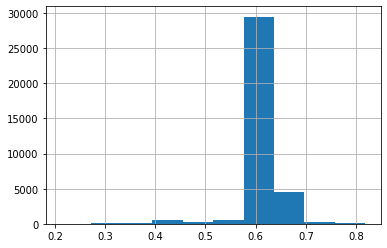

In [42]:
df.isna().mean(axis = 1).hist()

In [43]:
df.columns

Index(['age', 'sex', 'city', 'province', 'country', 'wuhan(0)_not_wuhan(1)',
       'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'not_wuhan', 'lives_in_wuhan'],
      dtype='object')

In [44]:
df.columns = ['age', 'sex', 'city', 'province', 'country', 'wuhan(0)_not_wuhan(1)',
       'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'not_wuhan', 'lives_in_wuhan']

df.columns

Index(['age', 'sex', 'city', 'province', 'country', 'wuhan(0)_not_wuhan(1)',
       'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'not_wuhan', 'lives_in_wuhan'],
      dtype='object')

In [45]:
df.rename(columns={
    'wuhan(0)_not_wuhan(1)': 'is_wuhan'
}, inplace=True)

df.columns

Index(['age', 'sex', 'city', 'province', 'country', 'is_wuhan', 'latitude',
       'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'not_wuhan', 'lives_in_wuhan'],
      dtype='object')

## 4. Створення нових змінних

In [48]:
df['sex'].isna().mean()

0.958764612337137

In [49]:
df.sex.isna().sum()

34365

In [50]:
df["sex"] == df.sex

0         True
1         True
2         True
3         True
4         True
         ...  
35838    False
35839    False
35840    False
35841    False
35842    False
Name: sex, Length: 35843, dtype: bool

In [52]:
# df['sex'] = df['sex'].values + df['sex'].index
df['sex'].values

array(['male', 'male', 'male', ..., nan, nan, nan], dtype=object)

In [60]:
import numpy as np

np.log1p(df['latitude'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        3.485752
1        3.489777
2        3.491291
3        3.491291
4        3.496545
           ...   
35838    3.466842
35839    3.466842
35840    3.466842
35841    3.443085
35842    3.443085
Name: latitude, Length: 35843, dtype: float64

In [59]:
np.log1p(np.array([1,2,3]))

array([0.69314718, 1.09861229, 1.38629436])

In [63]:
df['sex'] = np.where(df['sex'] == "male", 1, np.where(df['sex'] == "female", 0, -1))

In [64]:
#df['sex'][df['sex'].isna() == False] = np.array(df['sex'][df['sex'].isna() == False] == "male", dtype = np.int8)

In [65]:
#df['sex'][df['sex'].isna()] = 0.5

In [ ]:
#df['sex'] = pd.Series(df['sex'], dtype=np.float)

In [66]:
#df['sex'][] 

#df['sex'] = np.array(df.sex == "male", dtype = np.int8)

df.head()

,age,sex,city,province,country,is_wuhan,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,not_wuhan,lives_in_wuhan
0,30,1,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN
1,47,1,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN
2,49,1,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN
3,47,0,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN
4,50,0,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN


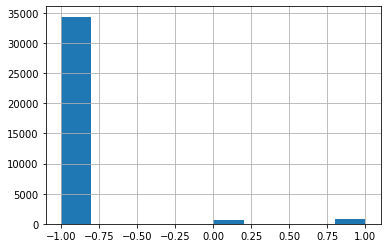

In [67]:
df.sex.hist()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35843 entries, 0 to 35842
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1673 non-null   object 
 1   sex                       35843 non-null  int64  
 2   city                      31727 non-null  object 
 3   province                  35441 non-null  object 
 4   country                   35817 non-null  object 
 5   is_wuhan                  14602 non-null  float64
 6   latitude                  35840 non-null  float64
 7   longitude                 35840 non-null  float64
 8   geo_resolution            35840 non-null  object 
 9   date_onset_symptoms       850 non-null    object 
 10  date_admission_hospital   790 non-null    object 
 11  date_confirmation         34916 non-null  object 
 12  symptoms                  556 non-null    object 
 13  lives_in_Wuhan            572 non-null    object 
 14  travel

In [71]:
df['is_wuhan'].unique(), df['lives_in_Wuhan'].unique(), df['not_wuhan'].unique(), df['lives_in_wuhan'].unique()

(array([ 1., nan]),
 array(['yes', 'no', nan, 'business trip', 'travel', 'study trip',
        'return from Wuhan', 'work in Wuhan',
        'lived in Wuhan for two months and then went back to Cangzhou',
        'used to be', 'Xiantao City resident', 'no, work in Wuhan',
        'medical trip', 'shanghai resident, travel history', 'tourism',
        'thai national', 'Chinese', '1', 'live in Hangzhou', '0', 'Yes',
        'No'], dtype=object),
 array([nan,  0.,  1.]),
 array([nan, 'yes', 'no'], dtype=object))

In [75]:
df['location_status'] = pd.Series(np.where(df['is_wuhan'] == 1, 1, np.where(
    df['lives_in_wuhan'] == 'yes', 2, np.where(
        df['lives_in_Wuhan'].isin(['yes', 'Yes', '1']), 2, np.where(
            df['not_wuhan'] == 1, 3, 4
        )
    )
)))

In [76]:
df.drop(columns=['is_wuhan', 'lives_in_Wuhan', 'not_wuhan', 'lives_in_wuhan'], inplace=True)

In [77]:
df.head()

,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,location_status
0,30,1,"Chaohu City, Hefei City",Anhui,China,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,1
1,47,1,"Baohe District, Hefei City",Anhui,China,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,1
2,49,1,"High-Tech Zone, Hefei City",Anhui,China,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,1
3,47,0,"High-Tech Zone, Hefei City",Anhui,China,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,1
4,50,0,"Feidong County, Hefei City",Anhui,China,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,1


## 5. Сабсети

In [78]:
df.loc[:4,['chronic_disease_binary', 'longitude', 'latitude']]#.hist()

,chronic_disease_binary,longitude,latitude
0,NaN,117.716600,31.646960
1,NaN,117.331900,31.778630
2,NaN,117.224844,31.828313
3,NaN,117.224844,31.828313
4,NaN,117.568100,32.001230


In [79]:
df.iloc[:4,[3, 5, 11]]

,province,latitude,symptoms
0,Anhui,31.646960,NaN
1,Anhui,31.778630,NaN
2,Anhui,31.828313,NaN
3,Anhui,31.828313,NaN


In [82]:
df.select_dtypes(exclude=['object']).corr()

,sex,latitude,longitude,chronic_disease_binary,location_status
sex,1.000000,-0.017327,-0.123855,0.024336,-0.206001
latitude,-0.017327,1.000000,-0.349551,-0.311483,-0.166879
longitude,-0.123855,-0.349551,1.000000,0.038097,0.200427
chronic_disease_binary,0.024336,-0.311483,0.038097,1.000000,0.190322
location_status,-0.206001,-0.166879,0.200427,0.190322,1.000000


In [83]:
df.corr()

,sex,latitude,longitude,chronic_disease_binary,location_status
sex,1.000000,-0.017327,-0.123855,0.024336,-0.206001
latitude,-0.017327,1.000000,-0.349551,-0.311483,-0.166879
longitude,-0.123855,-0.349551,1.000000,0.038097,0.200427
chronic_disease_binary,0.024336,-0.311483,0.038097,1.000000,0.190322
location_status,-0.206001,-0.166879,0.200427,0.190322,1.000000


In [84]:
#print(df['latitude'].skew(), df['latitude'].kurtosis())
#print(df['longitude'].skew(), df['longitude'].kurtosis())

In [85]:
df.loc[:,['chronic_disease_binary', 'longitude', 'latitude']].head()

,chronic_disease_binary,longitude,latitude
0,NaN,117.716600,31.646960
1,NaN,117.331900,31.778630
2,NaN,117.224844,31.828313
3,NaN,117.224844,31.828313
4,NaN,117.568100,32.001230


In [86]:
g = ((df['longitude'] > 30) & (df['latitude']))

g

0        True
1        True
2        True
3        True
4        True
         ... 
35838    True
35839    True
35840    True
35841    True
35842    True
Length: 35843, dtype: bool

In [87]:
(df['longitude'] > 30) & (df['latitude'] > 30)

0        True
1        True
2        True
3        True
4        True
         ... 
35838    True
35839    True
35840    True
35841    True
35842    True
Length: 35843, dtype: bool

In [88]:
df.loc[(df['longitude'] > 60) & (df['latitude'] > 60), "age"] 

3276    NaN
Name: age, dtype: object

In [89]:
df2 = df.loc[(df["country"] == "China") & (df["latitude"] > 47),:]

In [90]:
df2.to_excel("corona_china_lat_47_plus.xlsx")

In [95]:
df.iloc[3:6,[2,1,2,0,2]]['city'].iloc[:, 0]

3    High-Tech Zone, Hefei City
4    Feidong County, Hefei City
5                    Lu'an City
Name: city, dtype: object

In [96]:
#df["latitude_log"].skew(), df["latitude_log"].kurtosis()

In [97]:
#df["angle_log"].skew(), df["angle_log"].kurtosis()

In [99]:
g = df.corr()

In [100]:
g

,sex,latitude,longitude,chronic_disease_binary,location_status
sex,1.000000,-0.017327,-0.123855,0.024336,-0.206001
latitude,-0.017327,1.000000,-0.349551,-0.311483,-0.166879
longitude,-0.123855,-0.349551,1.000000,0.038097,0.200427
chronic_disease_binary,0.024336,-0.311483,0.038097,1.000000,0.190322
location_status,-0.206001,-0.166879,0.200427,0.190322,1.000000


In [101]:
g[np.abs(g) < 0.2] = np.nan
g

,sex,latitude,longitude,chronic_disease_binary,location_status
sex,1.000000,NaN,NaN,NaN,-0.206001
latitude,NaN,1.000000,-0.349551,-0.311483,NaN
longitude,NaN,-0.349551,1.000000,NaN,0.200427
chronic_disease_binary,NaN,-0.311483,NaN,1.000000,NaN
location_status,-0.206001,NaN,0.200427,NaN,1.000000


## Візуалізація в pandas

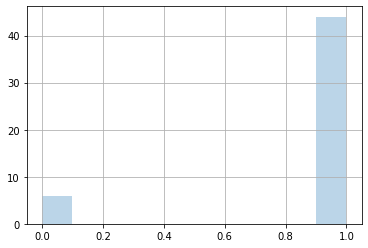

In [103]:
%matplotlib inline

(df["chronic_disease_binary"]).hist(alpha=0.3)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


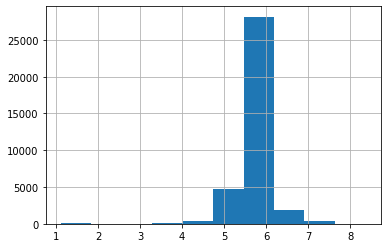

In [104]:
%matplotlib inline

df["latitude_log"] = np.sqrt(df.latitude)
df["latitude_log"].hist()

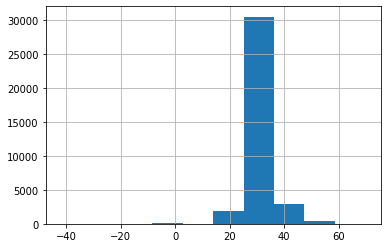

In [105]:
df["latitude"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7564fbe780>,
      dtype=object)

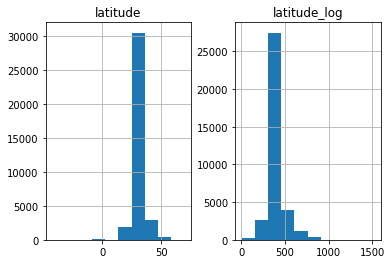

In [107]:
%matplotlib inline

df["latitude_log"] = df.latitude**1.7255
df.loc[:, ["latitude_log", "latitude"]].hist()

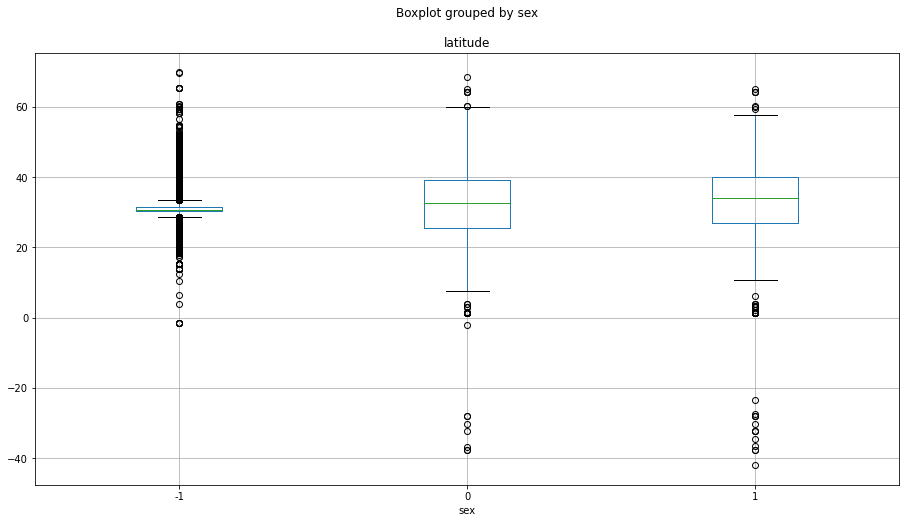

In [108]:
%matplotlib inline

df.boxplot('latitude', 'sex',  figsize = (15,8))

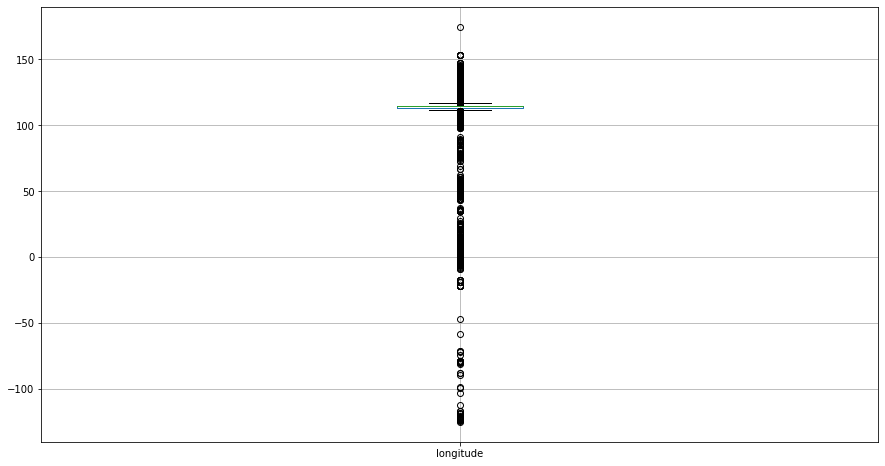

In [109]:
df.boxplot('longitude', figsize = (15,8))

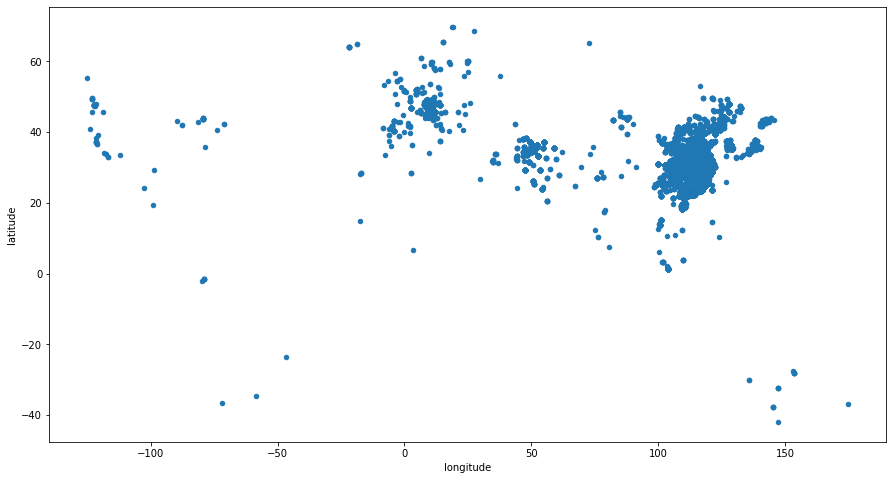

In [110]:
df.plot.scatter(x = 'longitude', y = 'latitude', figsize = (15,8))

## 6. Групові статистики

In [112]:
df.groupby(["sex"]).agg({ #, "is_pass_before"
    'latitude':np.mean,
    'longitude': np.std
}).reset_index()#.plot(kind='bar', figsize = (15,8))

#.reset_index()

,sex,latitude,longitude
0,-1,31.410755,20.089538
1,0,30.686332,52.333914
2,1,31.050186,52.812880


In [113]:
df['sex_longitude'] = df.groupby('sex')['longitude'].transform('mean')

In [115]:
df['sex_longitude']-df['longitude']

0       -21.450571
1       -21.065871
2       -20.958815
3       -22.265460
4       -22.608716
           ...    
35838    -1.459996
35839    -1.459996
35840    -1.459996
35841     1.256071
35842     1.256071
Length: 35843, dtype: float64

In [116]:
df.groupby(["sex"]).size().reset_index()

,sex,0
0,-1,34375
1,0,641
2,1,827


In [117]:
df['sex'].value_counts().reset_index()

,index,sex
0,-1,34375
1,1,827
2,0,641


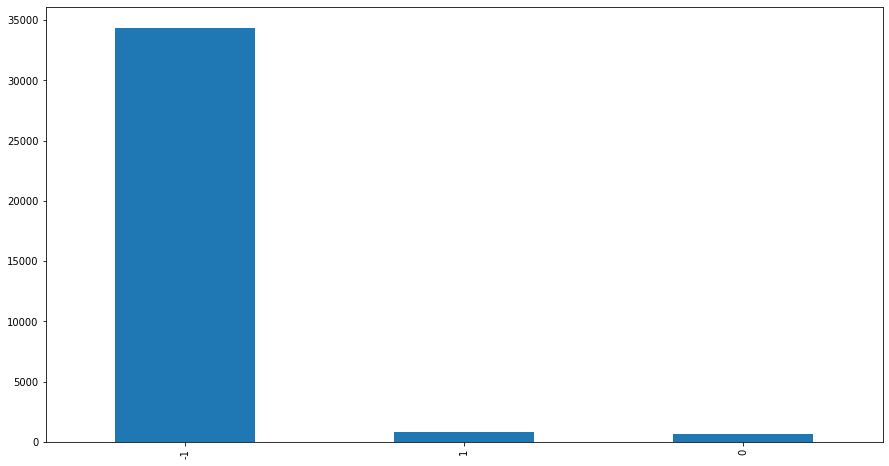

In [118]:
df.sex.value_counts().plot(kind='bar', figsize = (15,8))

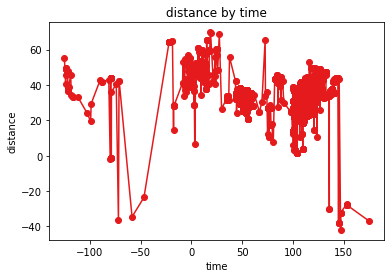

In [120]:
import matplotlib.pyplot as plt

df.sort_values(by='longitude', inplace=True)

x = df['longitude']
y = df['latitude']

plt.plot(x, y, '#e41a1c', marker = 'o', alpha = 1)
plt.title('distance by time')
plt.xlabel('time')
plt.ylabel('distance')
plt.show()

In [ ]:
??plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

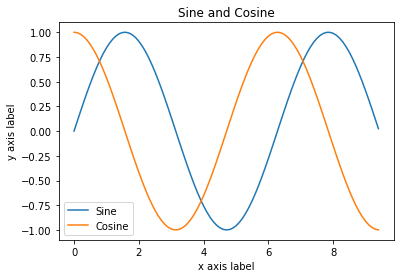

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

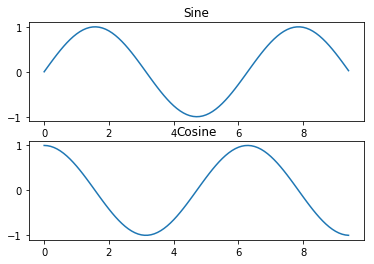

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.subplot(2, 1, 1)

plt.plot(x, y_sin)
plt.title('Sine')

plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

plt.show()

In [ ]:
df.columns

Index(['event', 'is_goal', 'period', 'time', 'distance', 'angle', 'is_rebound',
       'is_pass_before', 'is_cross_line', 'is_one_touch', 'is_fast_attack'],
      dtype='object')

# Статистичні тести з scipy.stats

У пакету можливості дуже широкі, проте я виділив найбільш популярні і необхідні функції.

## Описові статистики

```describe(a[, axis, ddof, bias, nan_policy])```	- вивід описових статистик по масиву.

```kurtosis(a[, axis, fisher, bias, nan_policy])``` - вивід ексцесу даного масиву.

```mode(a[, axis, nan_policy])```	- вивід модального значення масиву.

```skew(a[, axis, bias, nan_policy])``` - вивід асиметрії масиву даних.

```variation(a[, axis, nan_policy])``` - вивід міри варіації переданого масиву.

```find_repeats(arr)``` -  вивід повторів і кількості повторів у масиві.

```iqr(x[, axis, rng, scale, nan_policy, …])``` - вивід інтерквартильного розмаху масиву.

```sem(a[, axis, ddof, nan_policy])``` - стандартна помилка середнього.

```cumfreq(a[, numbins, defaultreallimits, weights])``` - вивід кумулятивних частот.

## Функції кореляції

```pearsonr(x, y)``` - кореляція Пірсона для неперервних шкал.

```spearmanr(a[, b, axis, nan_policy])``` - кореляція рангів Спірмена.

```kendalltau(x, y[, initial_lexsort, …])``` - кореляція Кендала для порядкових шкал.

```linregress(x[, y])``` - розрахунок лінійної регресії.

```f_oneway(*args)```	- одновибіркова ANOVA.

## Статистичні тести

```ttest_1samp(a, popmean[, axis, nan_policy])``` - одновибірковий т-тест для середніх значень.

```ttest_ind(a, b[, axis, equal_var, nan_policy])``` - двовибірковий т-тест для середніх значень (перевірка схожості).

```chisquare(f_obs[, f_exp, ddof, axis])``` - Хі-квадрат тест на нормальність.

```ks_2samp(data1, data2)``` - Колмогоров-Смірнов тест на нормальність двох вибірок.

```shapiro(x)``` - Шапіро-Вілко тест на нормальність розподілу даних.

```chi2_contingency(observed[, correction, lambda_])``` - Хі-квадрат тест для таблиць спряженості.

In [ ]:
from scipy import stats

In [ ]:
female = np.array([1,2,3,4,5,6,1,1,-10, -10,0, 1,-1])
male = np.array([2,2,2,4,4,5,1,1,1,10,20,10,6, 20, 11,88])
#is_goal = df['distance'].values[df.is_goal]
#not_goal = df['distance'].values[df.is_goal == False]
print(np.average(female))
print(np.average(male))

0.23076923076923078
11.6875


In [ ]:
print("Т-тест Стьюдента для порівняння середніх у двох групах:\n", stats.ttest_ind(female, male))

Т-тест Стьюдента для порівняння середніх у двох групах:
 Ttest_indResult(statistic=-1.8945458049787802, pvalue=0.06890999020328603)


In [ ]:
tt = stats.ttest_ind(female, male)
if tt.pvalue < 0.05:
    print("Гіпотезу прийнято - статистика по групах відмінна")
else:
    print("Гіпотезу відхилено - нема відмінностей по групах")

Гіпотезу відхилено - нема відмінностей по групах


In [ ]:
from scipy.spatial.distance import pdist

x = np.array([[0,1,1,2], [1,0,0,4], [2,0,0,5]])
print("Масив:\n",x)
d = pdist(x, 'euclidean')
print("Дистанції між рядами:",d)

Масив:
 [[0 1 1 2]
 [1 0 0 4]
 [2 0 0 5]]
Дистанції між рядами: [2.64575131 3.87298335 1.41421356]
